In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Example 1: Monte Carlo Estimation of Pi with Random Sampling

In this example, we used random points sampled from a uniform distribution over a square with side length 2. We then calculated the distance of each point from the origin and checked if the point lies within the unit circle. By calculating the ratio of points inside the circle to the total number of points, we can approximate the value of π.

#### Main Idea:
- We simulate a random sampling of points using the uniform distribution to estimate π.
- Points are uniformly distributed within a square, and the number of points inside the circle gives us a way to estimate the area of the circle.
- This is an example of using the **uniform distribution** to sample points in a geometric area for statistical approximation.

#### Concepts:
- **Uniform Distribution**: Random sampling from the square with bounds [-1, 1] for both x and y coordinates.
- **Monte Carlo Method**: A computational technique used to estimate values through repeated random sampling, which relies on the **uniform distribution** for generating random points.
- **Pi Approximation**: By calculating the ratio of points inside the circle to the total points, we approximate π, demonstrating the power of randomness in estimating mathematical constants.


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of random points
num_samples = 10000

# Generate uniform random points in [-1,1] x [-1,1]
x = np.random.uniform(-1, 1, num_samples)
y = np.random.uniform(-1, 1, num_samples)

# Compute distance from origin
distances = np.sqrt(x**2 + y**2)

# Count points inside the unit circle
inside_circle = distances <= 1
pi_estimate = (np.sum(inside_circle) / num_samples) * 4


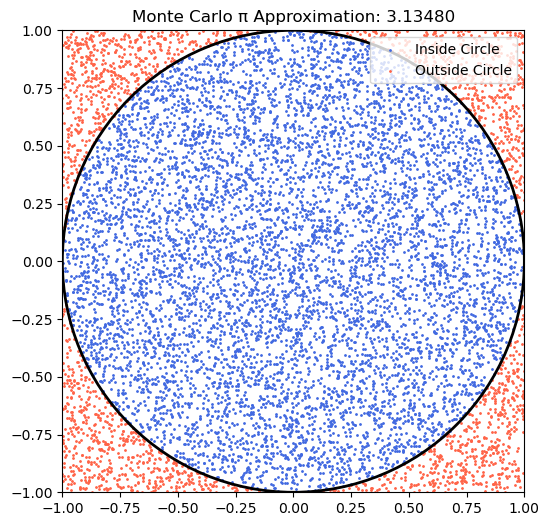

In [3]:
# Plot results
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect("equal")
ax.scatter(x[inside_circle], y[inside_circle], color="royalblue", s=1, label="Inside Circle")
ax.scatter(x[~inside_circle], y[~inside_circle], color="tomato", s=1, label="Outside Circle")

# Draw circle and square boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2)
ax.add_patch(circle)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.legend()
ax.set_title(f"Monte Carlo π Approximation: {pi_estimate:.5f}")

plt.show()

### Example 2: Simple Random Walk (Monte Carlo Simulation)

Here, we simulate a random walk, where each step is chosen randomly from four directions: up, down, left, and right. The position at each step is determined by sampling from these uniform choices. Over time, the trajectory of the walk forms a random path that fluctuates around the starting point.

#### Main Idea:
- A random walk is generated by randomly selecting a direction at each step.
- The random direction choice is sampled from a **uniform distribution** over four directions (up, down, left, right).
- This example shows how the **uniform distribution** can model random movement in 2D space, with the walk behaving unpredictably over time.

#### Concepts:
- **Uniform Distribution**: At each step of the walk, the random direction is chosen with equal probability (25%) from a uniform set of possible directions.
- **Random Walk**: A path that consists of successive random steps, often used in modeling phenomena such as stock prices or particle movement.
- **Monte Carlo Simulation**: The random sampling process used here is a Monte Carlo simulation, where randomness is harnessed to simulate real-world stochastic processes.


In [17]:

# Function to simulate the random walk
def random_walk(n_steps):
    # Define the starting point of the walk (origin)
    x, y = 0, 0

    np.random.seed(1)
    
    # Store the history of positions
    x_positions = [x]
    y_positions = [y]
    
    # Define the possible directions (up, down, left, right)
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # (dx, dy)
    
    for _ in range(n_steps):
        # Choose a random direction
        direction = directions[np.random.choice(4)]
        
        # Update position
        x += direction[0]
        y += direction[1]
        
        # Append the new position to the history
        x_positions.append(x)
        y_positions.append(y)
    
    return x_positions, y_positions

In [25]:
# Number of steps in the random walk
n_steps = 100000

# Simulate the random walk
x_positions, y_positions = random_walk(n_steps)

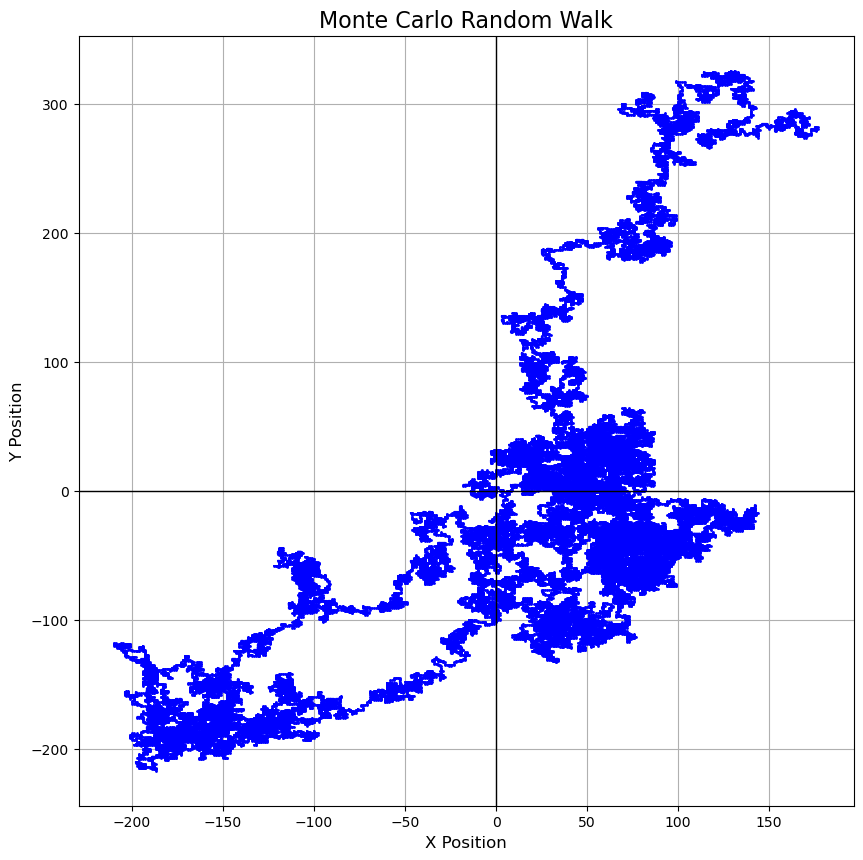

In [26]:
# Plot the trajectory of the random walk
plt.figure(figsize=(10, 10))
plt.plot(x_positions, y_positions, marker='o', color='blue', markersize=1, linewidth=1)
plt.title('Monte Carlo Random Walk', fontsize=16)
plt.xlabel('X Position', fontsize=12)
plt.ylabel('Y Position', fontsize=12)
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.show()

### Example 3: Biased Random Walk with Force (Monte Carlo Simulation)

This example extends the random walk by introducing a small force that biases the movement towards a fixed direction (positive x-axis). The force is applied to each step, slightly influencing the random walk to drift in that direction, simulating the effect of an external force like gravity or wind.

#### Main Idea:
- A random walk is simulated, but with a bias introduced by applying a constant force in the positive x-direction.
- The random direction is still chosen from the uniform distribution, but the force adds a small shift to the x-position, causing a gradual drift.
- The **uniform distribution** is used for selecting random directions, and the force applies a directional bias that influences the random walk.

#### Concepts:
- **Uniform Distribution**: As with the simple random walk, the directions are selected uniformly at random from a set of four possibilities.
- **Biasing Force**: The introduction of a small force causes the walk to have a bias in the x-direction, illustrating how external forces can affect stochastic processes.
- **Monte Carlo Simulation**: The use of random sampling to simulate the biased random walk and visualize its effects is a Monte Carlo approach, relying on the **uniform distribution** to generate randomness in the system.


In [27]:
# Function to simulate the biased random walk with force
def biased_random_walk(n_steps, force_direction=(1, 0), force_magnitude=0.1):
    # Define the starting point of the walk (origin)
    x, y = 0, 0

    np.random.seed(1)
    
    # Store the history of positions
    x_positions = [x]
    y_positions = [y]
    
    # Define the possible random directions (up, down, left, right)
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # (dx, dy)
    
    for _ in range(n_steps):
        # Choose a random direction
        direction = directions[np.random.choice(4)]
        
        # Apply the random walk direction
        x += direction[0]
        y += direction[1]
        
        # Apply the force: Add a small shift in the force direction (x, y)
        x += force_direction[0] * force_magnitude
        y += force_direction[1] * force_magnitude
        
        # Append the new position to the history
        x_positions.append(x)
        y_positions.append(y)
    
    return x_positions, y_positions

In [28]:
# Number of steps in the random walk
n_steps = 100000

# Simulate the biased random walk with a force in the positive x direction
force_direction = (1, 0)  # Force in the positive x-direction
force_magnitude = 0.01  # Magnitude of the force (small bias)

x_positions, y_positions = biased_random_walk(n_steps, force_direction, force_magnitude)

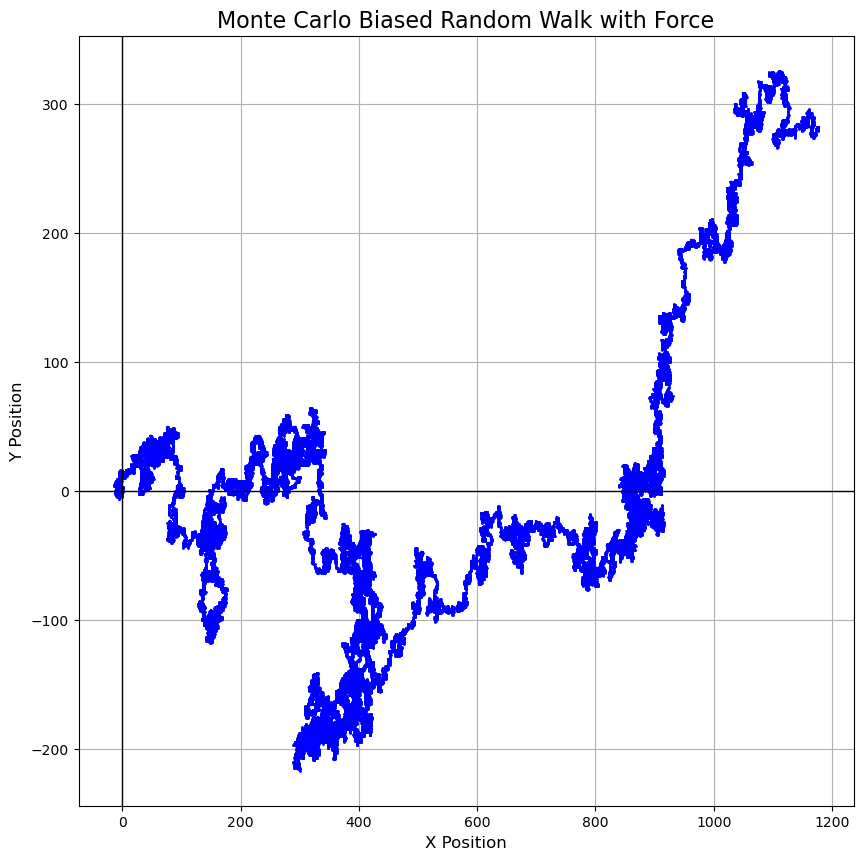

In [29]:
# Plot the trajectory of the random walk
plt.figure(figsize=(10, 10))
plt.plot(x_positions, y_positions, marker='o', color='blue', markersize=1, linewidth=1)
plt.title('Monte Carlo Biased Random Walk with Force', fontsize=16)
plt.xlabel('X Position', fontsize=12)
plt.ylabel('Y Position', fontsize=12)
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.show()